# Exoplanet Exploration - Model 1

In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("../data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df.shape

(6991, 41)

In [4]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

Source: https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

Transit parameters delivered by the Kepler Project are typically best-fit parameters produced by a Mandel-Agol (2002) fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris. Some of the parameters are fit directly, other are derived from the best-fit parameters. 

Best-fit planetary transit parameters are typically normalized to the size of the host star. Physical planet parameters may be derived by scaling to the star's size and temperature. Transit parameters also depend weakly upon the limb-darkening coefficients which are derived from the stellar parameters (e.g., Claret and Bloemen 2011).

Features Defined:

ii) koi_disposition-The category of this KOI from the Exoplanet Archive

a) koi_period-The interval(days) between consecutive planetary transits.

b) koi_impact-The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.

c) koi_duration-The duration(hours) of the observed transits. Duration is measured from first contact between the planet and star until last contact. Contact times are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.

d) koi_depth-The fraction of stellar flux lost at the minimum of the planetary transit(parts per million). Transit depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.

e) koi_teq-Approximation for the temperature(Kelvin) of the planet. The calculation of equilibrium temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet.

In [5]:
# Set features. This will also be used as your x values.
# TRANSIT PROPERTIES SELECTED
df_transit = df[['koi_disposition', 'koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_teq']]
df_transit = df_transit.rename({'koi_disposition': 'category', 
                                  'koi_period': 'period (days)', 
                                  'koi_impact': 'impact (rds)', 
                                  'koi_duration': 'duration (hrs)', 
                                  'koi_depth': 'depth (ppm)', 
                                  'koi_teq': 'eq.temp (K)'}, axis=1, inplace=False)
df_transit

,category,period (days),impact (rds),duration (hrs),depth (ppm),eq.temp (K)
0,CONFIRMED,54.418383,0.586,4.50700,874.8,443
1,FALSE POSITIVE,19.899140,0.969,1.78220,10829.0,638
2,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,1395
3,CONFIRMED,2.525592,0.701,1.65450,603.3,1406
4,CONFIRMED,4.134435,0.762,3.14020,686.0,1160
...,...,...,...,...,...,...
6986,FALSE POSITIVE,8.589871,0.765,4.80600,87.7,929
6987,FALSE POSITIVE,0.527699,1.252,3.22210,1579.2,2088
6988,CANDIDATE,1.739849,0.043,3.11400,48.5,1608
6989,FALSE POSITIVE,0.681402,0.147,0.86500,103.6,2218


# Create a Train Test Split

Use `koi_disposition` for the y values, renamed to `category`

In [6]:
X = df_transit[['period (days)','impact (rds)','duration (hrs)','depth (ppm)','eq.temp (K)']]
y = df_transit[['category']]
print(X.shape, y.shape)

(6991, 5) (6991, 1)


In [7]:
feature_names = X.columns
feature_names

Index(['period (days)', 'impact (rds)', 'duration (hrs)', 'depth (ppm)',
       'eq.temp (K)'],
      dtype='object')

In [8]:
data = y.copy()
# using get_dummies with a single column
data_binary_encoded = pd.get_dummies(data, columns=['category'])
data_binary_encoded.head()

,category_CANDIDATE,category_CONFIRMED,category_FALSE POSITIVE
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [9]:
y2 = data_binary_encoded.copy()
y2 = y2.drop("category_CANDIDATE", axis=1)
y2 = y2.drop("category_FALSE POSITIVE", axis=1)
target = y2.rename(columns={'category_CONFIRMED': 'Confirmed'})
target_names = ["confirmed","no"]
target

,Confirmed
0,1
1,0
2,0
3,1
4,1
...,...
6986,0
6987,0
6988,0
6989,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=42)

X_train.head()

,period (days),impact (rds),duration (hrs),depth (ppm),eq.temp (K)
6122,6.768901,0.150,3.61600,123.1,1017
6370,0.733726,0.291,2.30900,114.6,1867
2879,7.652707,0.970,79.89690,641.1,989
107,7.953547,0.300,2.63120,875.4,696
29,4.959319,0.831,2.22739,9802.0,1103


In [11]:
X_train['period (days)'].describe()

count    5243.000000
mean       56.887040
std       118.619994
min         0.259820
25%         2.665853
50%         9.178585
75%        34.597291
max       809.014188
Name: period (days), dtype: float64

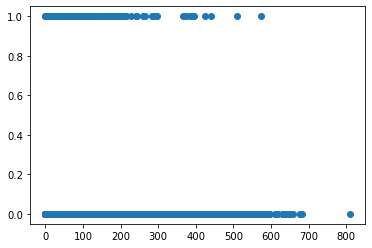

In [12]:
plt.scatter(X_train['period (days)'],y_train)

In [13]:
y_train.head()

,Confirmed
6122,0
6370,0
2879,0
107,1
29,0


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [15]:
print(X_train_scaled)

[[8.04827937e-03 1.48800667e-03 2.49253828e-02 7.48673780e-05
  7.06538344e-02]
 [5.85971231e-04 2.88673293e-03 1.54798985e-02 6.93528831e-05
  1.35578980e-01]
 [9.14107928e-03 9.62244311e-03 5.76195501e-01 4.10927186e-04
  6.85151237e-02]
 ...
 [7.28333836e-03 1.25984564e-02 1.10009178e-02 1.37602867e-03
  1.64909869e-01]
 [3.81261085e-03 1.20032538e-02 1.96013673e-01 1.03218370e-04
  1.52917812e-01]
 [2.48788464e-03 7.13251195e-03 3.76952151e-02 9.16703684e-05
  9.36449740e-02]]


# Train the Model - using LinearRegression

In [16]:
# Generate the model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
modelLin = LinearRegression()
modelLin.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
print(f"Training Data Score: {modelLin.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {modelLin.score(X_test_scaled, y_test)}")

Training Data Score: 0.11842652317002478
Testing Data Score: 0.10764511362287243


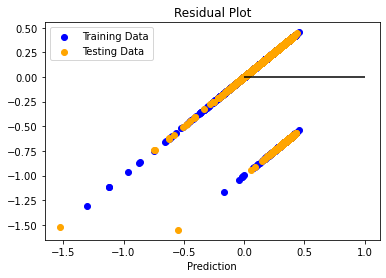

In [18]:
# create a residuals plot using the predictions for both test and train data
plt.scatter(modelLin.predict(X_train_scaled), modelLin.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(modelLin.predict(X_test_scaled), modelLin.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()

# create a horizontal line at y=0 to show how much error is in each prediction
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

predictionLin = modelLin.predict(X_test_scaled)
print("Predictions using Linear Regression")
print(predictionLin)

MSE = mean_squared_error(y_test, predictionLin)
r2 = modelLin.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

Predictions using Linear Regression
[[0.35384986]
 [0.3499245 ]
 [0.30204878]
 ...
 [0.37138199]
 [0.30301001]
 [0.27076218]]
MSE: 0.17866816831797755, R2: 0.10764511362287243


# Train the Model - using LogisticRegression

In [20]:
# Generate the model and fit it to the scaled training data
from sklearn.linear_model import LogisticRegression
modelLog = LogisticRegression(solver='liblinear')
modelLog.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [21]:
print(f"Training Data Score: {modelLog.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {modelLog.score(X_test_scaled, y_test)}")

Training Data Score: 0.7489986648865153
Testing Data Score: 0.7231121281464531


In [22]:
predictionLog = modelLog.predict(X_test_scaled)
print("Predictions using Logistical Regression")
print(predictionLog)

MSE = mean_squared_error(y_test, predictionLog)
r2 = modelLog.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

Predictions using Logistical Regression
[0 0 0 ... 0 0 0]
MSE: 0.2768878718535469, R2: 0.7231121281464531


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

GridSearch requires 2 things:
1. A model
2. A dictionary of the hyperparameters and the associated lists of values to test with.

In [23]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

# l is the penalty weight for wrong prediction, #1,2 is different weighting ratios
# gamma isn't used because for logistic regression
param_grid = {'C': [1,5,10],
              'penalty': ['l1','l2']}

grid = GridSearchCV(modelLog, param_grid, verbose=3)
grid

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [24]:
X_train_df = pd.DataFrame(X_train_scaled)
X_train_df

,0,1,2,3,4
0,0.008048,0.001488,0.024925,0.000075,0.070654
1,0.000586,0.002887,0.015480,0.000069,0.135579
2,0.009141,0.009622,0.576196,0.000411,0.068515
3,0.009513,0.002976,0.017808,0.000563,0.046135
4,0.005811,0.008244,0.014890,0.006354,0.077223
...,...,...,...,...,...
5238,0.009902,0.010902,0.023878,0.046368,0.058891
5239,0.013480,0.007331,0.036337,0.000076,0.076459
5240,0.007283,0.012598,0.011001,0.001376,0.164910
5241,0.003813,0.012003,0.196014,0.000103,0.152918


In [25]:
X_train_df.describe()

,0,1,2,3,4
count,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000
mean,0.070018,0.007083,0.039390,0.015849,0.076643
std,0.146670,0.031670,0.048188,0.054054,0.065530
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002975,0.001992,0.016594,0.000097,0.035060
50%,0.011028,0.005406,0.026320,0.000267,0.060648
75%,0.042457,0.008834,0.043751,0.001005,0.099526
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Train the model with GridSearch
grid.fit(X_train_df, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.763, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.759, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.746, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.748, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.760, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.749, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=5, penalty=l1 .................................................
[CV] ..................... C=5, penalty=l1, score=0.746, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ..................... C=5, penalty=l1, score=0.765, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.760, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.757, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.751, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.751, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.758, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [27]:
# List the best parameters and score for this dataset
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'penalty': 'l2'}
0.7552923904263602


In [28]:
print(X_test_scaled)

[[1.09135358e-01 9.04410452e-03 5.09709264e-02 5.32181197e-04
  8.93675527e-03]
 [1.26408343e-01 9.51431462e-03 1.91294544e-02 4.07683365e-04
  1.71860678e-02]
 [1.13921565e-03 6.26946809e-03 6.11390951e-03 2.35306742e-04
  9.97555759e-02]
 ...
 [5.01719838e-02 3.60097613e-03 3.46093530e-02 1.66797252e-04
  3.08585396e-02]
 [9.05664900e-03 8.08483622e-03 2.71078895e-02 6.47012445e-04
  8.67705469e-02]
 [8.80485257e-04 5.87266631e-03 1.03726883e-02 4.28184311e-05
  1.15872288e-01]]


In [29]:
X_test_df = pd.DataFrame(X_test_scaled)
X_test_df

,0,1,2,3,4
0,0.109135,0.009044,0.050971,0.000532,0.008937
1,0.126408,0.009514,0.019129,0.000408,0.017186
2,0.001139,0.006269,0.006114,0.000235,0.099756
3,0.010080,0.005347,0.037897,0.088298,0.076994
4,0.001157,0.012708,0.035530,0.005220,0.142606
...,...,...,...,...,...
1743,0.188643,0.004057,0.162756,0.001405,0.049038
1744,0.057928,0.012202,0.040282,0.000483,0.050336
1745,0.050172,0.003601,0.034609,0.000167,0.030859
1746,0.009057,0.008085,0.027108,0.000647,0.086771


In [30]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_df)
print(predictions)
df_pred = pd.DataFrame(predictions)
df_pred
df_pred = df_pred[df_pred[0] > 0]
df_pred.head()

[0 0 0 ... 0 0 0]


,0
25,1
70,1
129,1
140,1
172,1


In [31]:
# Calculate classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions,
                            target_names=target_names)
print(report)

              precision    recall  f1-score   support

   confirmed       0.73      0.99      0.84      1264
          no       0.63      0.06      0.10       484

    accuracy                           0.73      1748
   macro avg       0.68      0.52      0.47      1748
weighted avg       0.70      0.73      0.64      1748



# Save the Model

In [32]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = '../model/modelLog.sav'
joblib.dump(modelLog, filename)

['../model/modelLog.sav']